In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:

wine_df.shape

(1599, 12)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_df['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

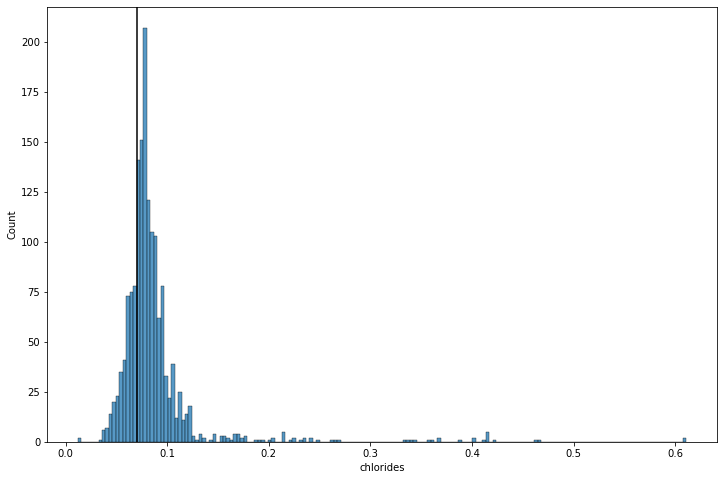

In [10]:
### histplot
plt.figure(figsize=(12,8))
sns.histplot(data=wine_df,x= 'chlorides')
plt.axvline( 0.070000,color='black')

In [11]:
feature_= wine_df.columns[:-1]
def get_percentile(feature,q_range):
    dist = wine_df[feature].describe()[str(q_range)+'%']
    return round(dist,2)
def counterplots():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data=wine_df,x=feature, kde=True,color='orange')
        plt.axvline( q1,color='black',label='Q1')
        plt.axvline( q2,color='green',label='Q2')
        plt.axvline( q3,color='red',label='Q3')
        plt.legend()


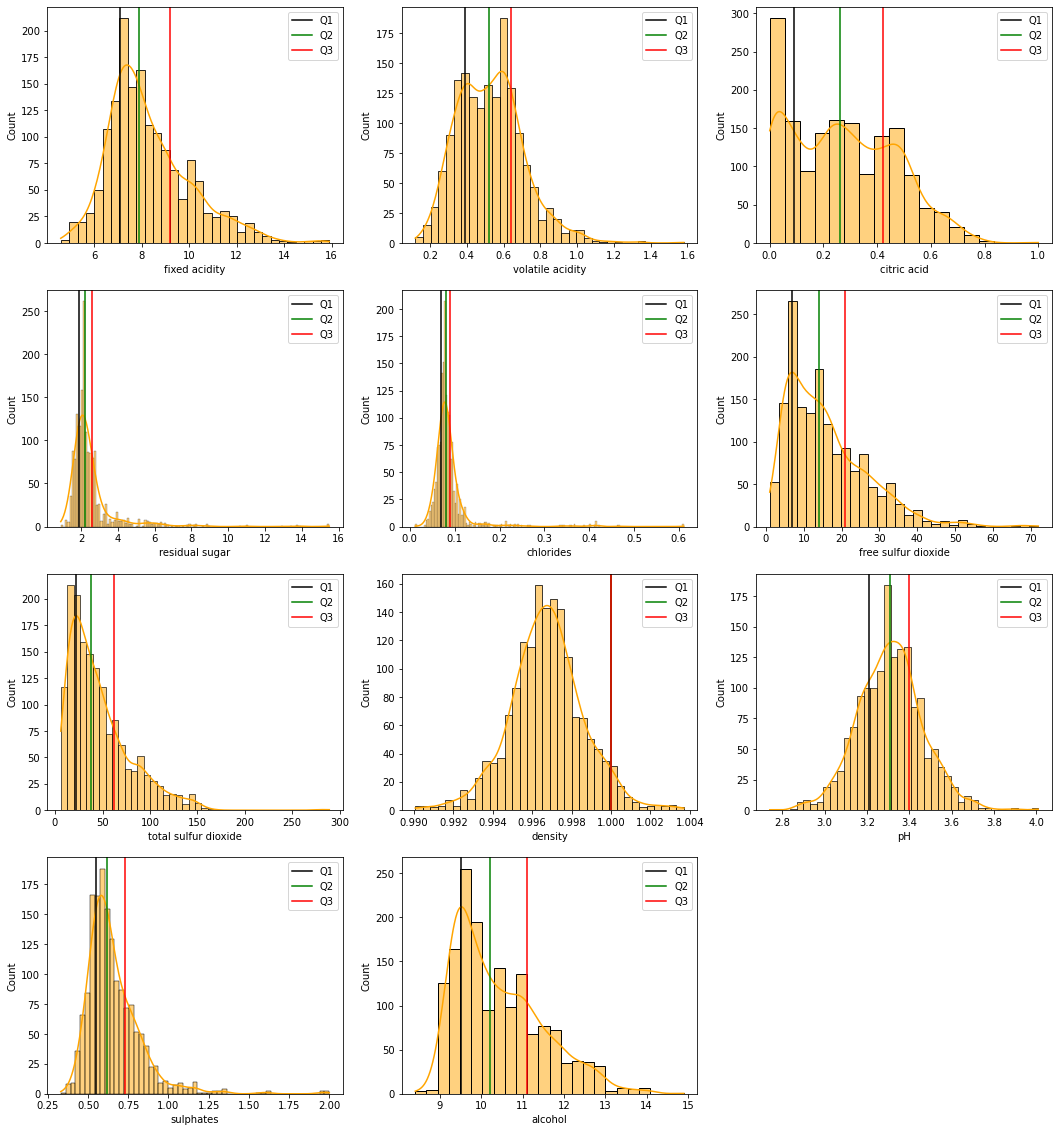

In [12]:
counterplots()

Text(0, 0.5, 'alcohol')

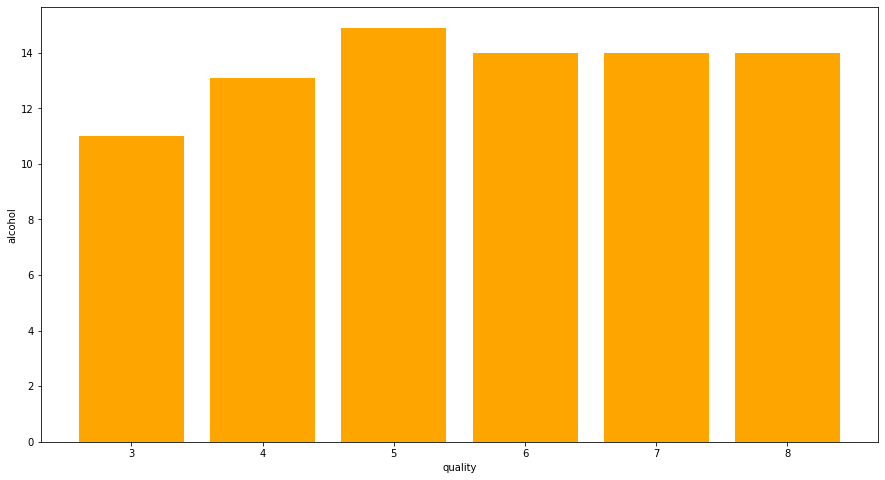

In [42]:
plt.figure(figsize=[15,8])
plt.bar(wine_df['quality'],wine_df['alcohol'],color='orange')
plt.xlabel('quality')
plt.ylabel('alcohol')

Text(0, 0.5, 'count')

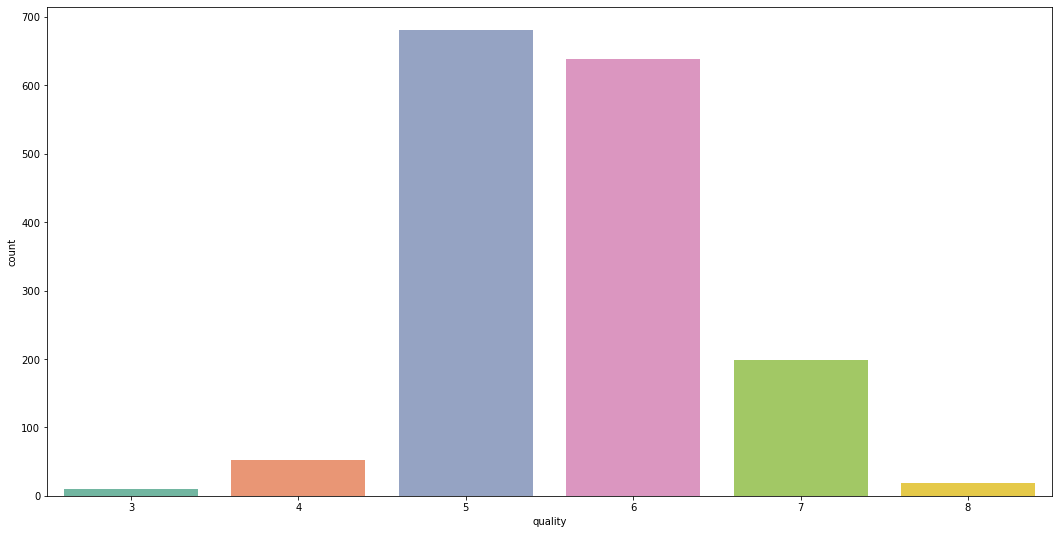

In [13]:
plt.figure(figsize=(18,9))
ax1 = sns.countplot(x='quality',data=wine_df,palette='Set2')
plt.xlabel('quality')
plt.ylabel('count')

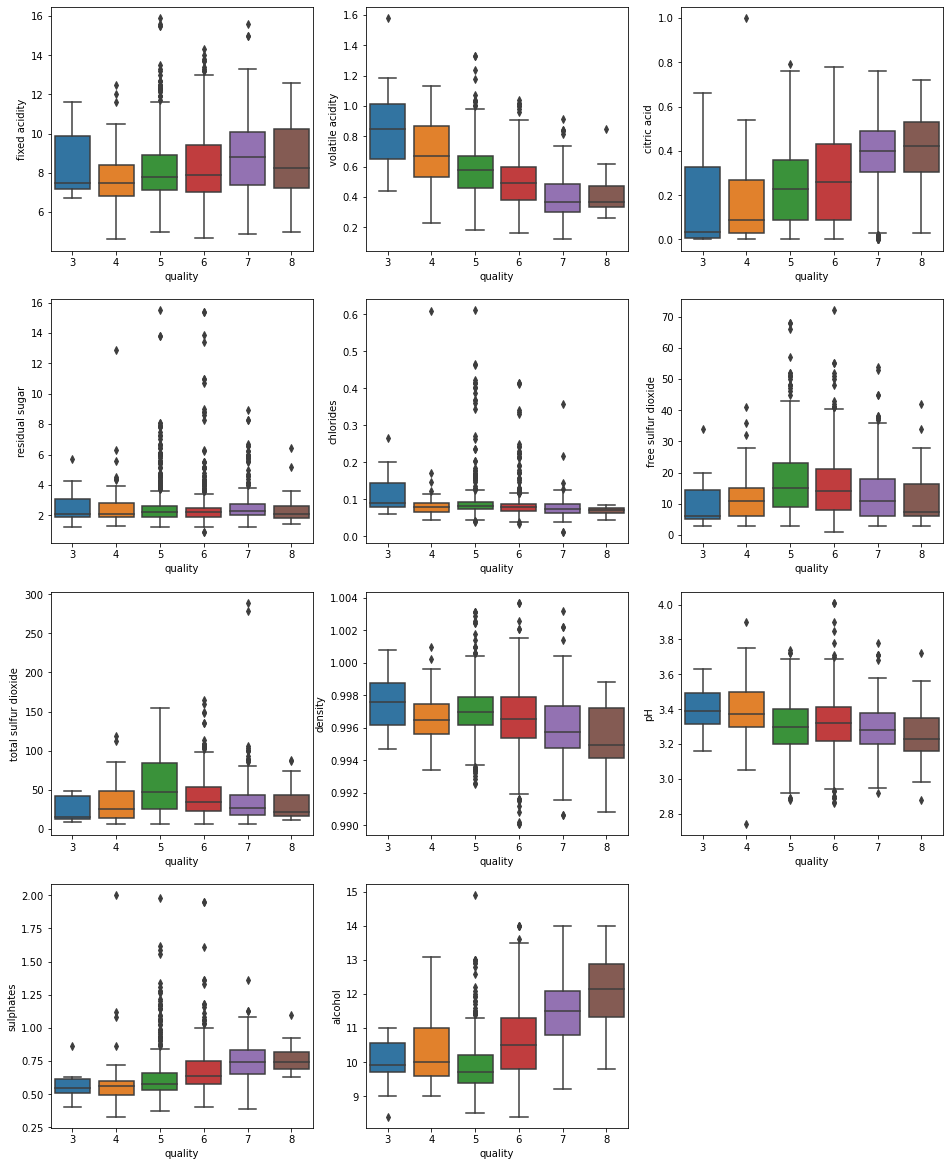

In [14]:
features_ = wine_df.columns[:-1]
fig = plt.figure(figsize=(16,26))
for column, feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=wine_df,x='quality',y=feature)
    

## FEATURE ENGINEERING

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor()
x=wine_df.drop(['quality'],axis=1)
rf.fit(x, wine_df.quality)

## store information and feature names
features = wine_df.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]

In [17]:
sorted_index

array([ 5,  2,  0,  3,  7,  8,  4,  6,  1,  9, 10], dtype=int64)

In [18]:
importances

array([0.0521584 , 0.12845265, 0.04883698, 0.05491699, 0.06414881,
       0.0484306 , 0.08040222, 0.05494334, 0.05776064, 0.13742992,
       0.27251944])

([<matplotlib.axis.YTick at 0x20077773370>,
 [Text(0, 0, 'free sulfur dioxide'),
  Text(0, 1, 'citric acid'),
  Text(0, 2, 'fixed acidity'),
  Text(0, 3, 'residual sugar'),
  Text(0, 4, 'density'),
  Text(0, 5, 'pH'),
  Text(0, 6, 'chlorides'),
  Text(0, 7, 'total sulfur dioxide'),
  Text(0, 8, 'volatile acidity'),
  Text(0, 9, 'sulphates'),
  Text(0, 10, 'alcohol')])

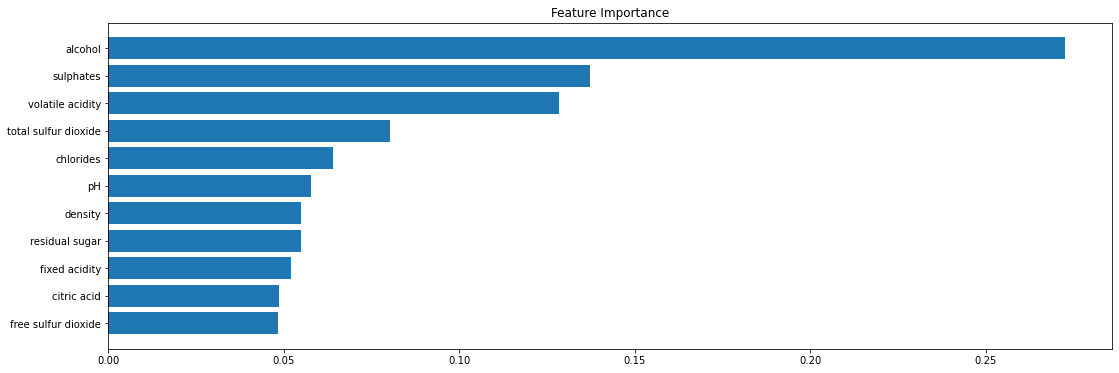

In [19]:
plt.figure(figsize=(18,6))
plt.title('Feature Importance')
plt.barh(range(len(sorted_index)),importances[sorted_index])
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])

<AxesSubplot:>

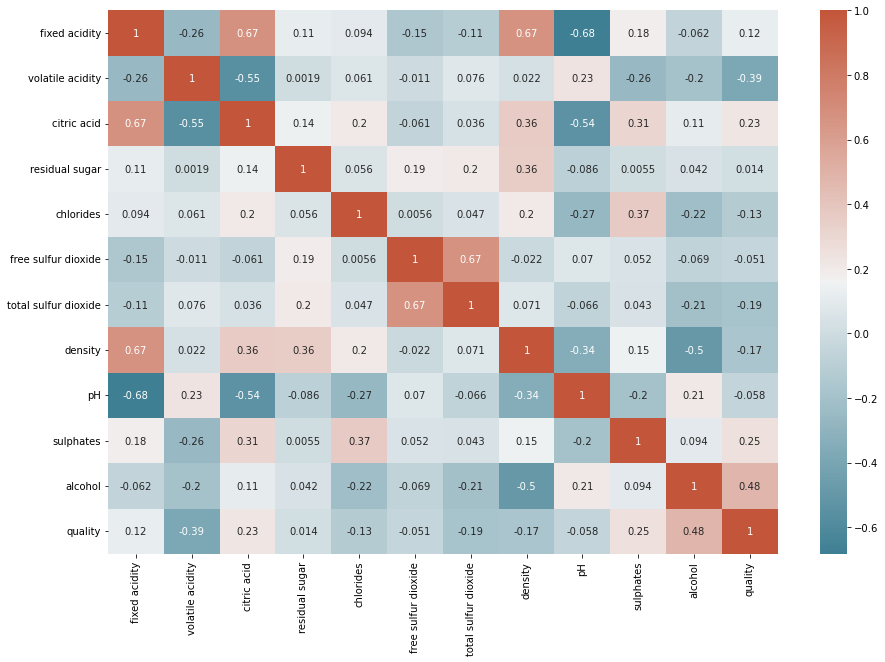

In [43]:
corr = wine_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

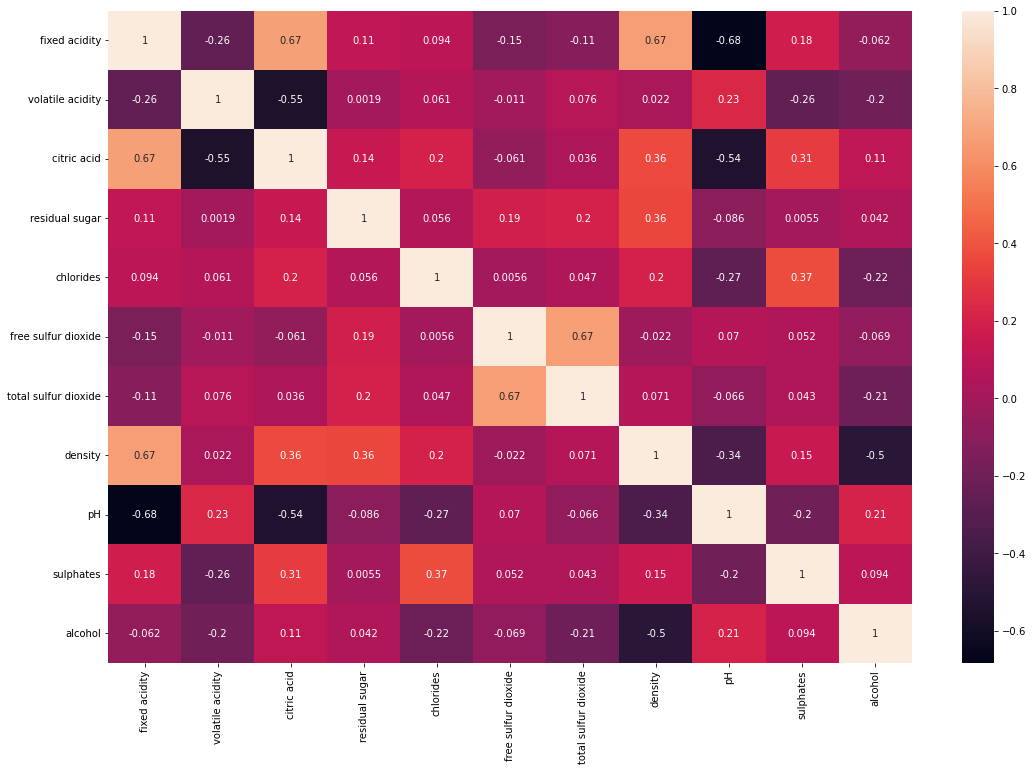

In [21]:
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True)

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
x = wine_df.drop('quality',axis='columns')
y=wine_df['quality']
smote = SMOTE(sampling_strategy='auto')
x_sm,y_sm = smote.fit_resample(x,y)

In [24]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [25]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,10.093356,0.346533,0.495335,2.444006,0.068440,4.653346,15.480019,0.996992,3.163866,0.727997,10.826673
4082,9.664956,0.274359,0.527236,2.171226,0.082202,37.692294,68.096847,0.994955,3.039032,0.666695,11.959545
4083,11.988389,0.322876,0.658839,2.328760,0.071356,5.678099,24.815293,0.998217,2.966913,0.765277,10.186281
4084,9.524520,0.389183,0.451635,2.152198,0.068880,5.559752,13.760991,0.996058,3.261950,0.672390,11.391827


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [27]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.598024,0.471521,-1.357487,-0.568694,-0.295327,-0.252242,-0.090523,0.683210,1.237242,-0.625967,-1.114866
1,-0.353430,1.203774,-1.357487,0.018643,0.195764,1.191346,1.088191,0.139601,-0.814313,0.137086,-0.769574
2,-0.353430,0.715605,-1.159289,-0.233073,0.061830,0.160211,0.623849,0.248323,-0.417238,-0.053677,-0.769574
3,1.725616,-1.237070,1.417290,-0.568694,-0.317649,0.366438,0.838161,0.791931,-1.079030,-0.498791,-0.769574
4,-0.598024,0.471521,-1.357487,-0.568694,-0.295327,-0.252242,-0.090523,0.683210,1.237242,-0.625967,-1.114866
...,...,...,...,...,...,...,...,...,...,...,...
4081,1.048920,-0.966407,1.096876,-0.112244,-0.464082,-0.906667,-0.752031,0.243978,-1.053444,0.442289,0.116682
4082,0.786961,-1.260018,1.254948,-0.341121,-0.156878,2.500091,1.127369,-0.863286,-1.879590,0.052485,1.094612
4083,2.207703,-1.062647,1.907033,-0.208941,-0.398987,-0.801002,-0.418588,0.909976,-2.356863,0.679343,-0.436124
4084,0.701087,-0.792907,0.880344,-0.357086,-0.454251,-0.813205,-0.813432,-0.263699,-0.404330,0.088697,0.604540


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [29]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [30]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(y_train)
y_test =le.fit_transform(y_test)


In [31]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [32]:
model= Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [34]:
model.fit(x_train,y_train,epochs=800,verbose=1)

Epoch 1/800
103/103 [==============================] - 1s 1ms/step - loss: 1.3539 - accuracy: 0.4614
Epoch 2/800
103/103 [==============================] - 0s 1ms/step - loss: 1.0112 - accuracy: 0.5701
Epoch 3/800
103/103 [==============================] - 0s 1ms/step - loss: 0.9257 - accuracy: 0.6105
Epoch 4/800
103/103 [==============================] - 0s 1ms/step - loss: 0.8758 - accuracy: 0.6386
Epoch 5/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.6619
Epoch 6/800
103/103 [==============================] - 0s 1ms/step - loss: 0.7914 - accuracy: 0.6808
Epoch 7/800
103/103 [==============================] - 0s 1ms/step - loss: 0.7551 - accuracy: 0.7090
Epoch 8/800
103/103 [==============================] - 0s 2ms/step - loss: 0.7255 - accuracy: 0.7084
Epoch 9/800
103/103 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0.7188
Epoch 10/800
103/103 [==============================] - 0s 1ms/step - loss: 0.6865 - accura

103/103 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8776
Epoch 82/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8693
Epoch 83/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8748
Epoch 84/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8761
Epoch 85/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8886
Epoch 86/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8782
Epoch 87/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8739
Epoch 88/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8804
Epoch 89/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8712
Epoch 90/800
103/103 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 

103/103 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9149
Epoch 161/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2146 - accuracy: 0.9171
Epoch 162/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9201
Epoch 163/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9207
Epoch 164/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9137
Epoch 165/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9146
Epoch 166/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9217
Epoch 167/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9226
Epoch 168/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9128
Epoch 169/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2138 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9388
Epoch 240/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9379
Epoch 241/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9348
Epoch 242/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9495
Epoch 243/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9403
Epoch 244/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9388
Epoch 245/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.9357
Epoch 246/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9400
Epoch 247/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9382
Epoch 248/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1448 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9360
Epoch 319/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9513
Epoch 320/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9498
Epoch 321/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9492
Epoch 322/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.9471
Epoch 323/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9455
Epoch 324/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9501
Epoch 325/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9431
Epoch 326/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9501
Epoch 327/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1372 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9575
Epoch 398/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9550
Epoch 399/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9596
Epoch 400/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9468
Epoch 401/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9550
Epoch 402/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9559
Epoch 403/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9547
Epoch 404/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.9550
Epoch 405/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9547
Epoch 406/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1224 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9602
Epoch 477/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9590
Epoch 478/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9575
Epoch 479/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9614
Epoch 480/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9621
Epoch 481/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9645
Epoch 482/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9569
Epoch 483/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9682
Epoch 484/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9599
Epoch 485/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1048 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9642
Epoch 556/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9660
Epoch 557/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9642
Epoch 558/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9630
Epoch 559/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9663
Epoch 560/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9618
Epoch 561/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9621
Epoch 562/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9611
Epoch 563/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9593
Epoch 564/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0828 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9633
Epoch 635/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9627
Epoch 636/800
103/103 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9642
Epoch 637/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9682
Epoch 638/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9709
Epoch 639/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9636
Epoch 640/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9688
Epoch 641/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9593
Epoch 642/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.9679
Epoch 643/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0917 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9651
Epoch 714/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9673
Epoch 715/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9703
Epoch 716/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9676
Epoch 717/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9670
Epoch 718/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9700
Epoch 719/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9734
Epoch 720/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9706
Epoch 721/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9749
Epoch 722/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0888 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9676
Epoch 793/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9709
Epoch 794/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9670
Epoch 795/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9712
Epoch 796/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9752
Epoch 797/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9746
Epoch 798/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9740
Epoch 799/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9749
Epoch 800/800
103/103 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9709


In [35]:
y_pred = model.predict(x_test)

In [36]:
y_pred

array([[3.76162726e-16, 3.36718162e-17, 4.25177999e-03, 9.95748222e-01,
        1.21034367e-12, 1.35326264e-20],
       [2.27332931e-12, 4.88441215e-22, 5.38503230e-02, 9.46149647e-01,
        6.28616625e-14, 2.12563365e-13],
       [2.28416542e-13, 2.18539258e-29, 8.98603503e-09, 1.44278549e-03,
        9.98352885e-01, 2.04398690e-04],
       ...,
       [1.00000000e+00, 1.08437061e-18, 3.54714480e-09, 1.93523196e-33,
        0.00000000e+00, 0.00000000e+00],
       [4.95423155e-05, 9.98056471e-01, 1.88956538e-03, 4.37231301e-06,
        4.08157541e-22, 5.44164708e-20],
       [4.65680229e-12, 8.20221813e-32, 1.07953995e-01, 8.92046034e-01,
        2.00132508e-25, 2.42314220e-21]], dtype=float32)

In [37]:
y_pred = np.argmax(y_pred,axis=1)

In [38]:
y_pred

array([3, 3, 4, 3, 1, 1, 3, 3, 2, 2, 5, 4, 2, 0, 5, 2, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 3,
       4, 1, 4, 1, 1, 5, 2, 3, 2, 3, 3, 0, 1, 4, 1, 3, 2, 1, 3, 0, 5, 1,
       0, 4, 3, 3, 1, 0, 3, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 2, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 1, 3, 1, 4, 5, 5, 1, 5, 2, 2, 3, 1, 4, 0, 4, 4,
       3, 1, 4, 3, 3, 3, 0, 5, 1, 2, 2, 3, 3, 2, 3, 4, 3, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 3, 2, 0, 4, 2, 1, 3, 4, 5, 4, 4, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       2, 0, 3, 1, 1, 3, 5, 5, 3, 4, 3, 4, 3, 4, 4, 3, 3, 5, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 2, 5, 4, 3, 2, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 2, 0, 2, 0, 3, 5, 4, 1, 5, 1, 3, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 4, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 5, 5, 0, 4, 1, 3, 3, 0, 3, 2, 3, 0, 5, 2, 5, 2, 3, 3, 2,
       0, 1, 1, 5, 5, 0, 1, 3, 4, 0, 0, 2, 4, 1, 3,

In [39]:
y_test = np.argmax(y_test,axis=1)

In [40]:
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       132
           1       0.93      0.99      0.96       131
           2       0.76      0.67      0.71       150
           3       0.68      0.70      0.69       155
           4       0.89      0.90      0.89       116
           5       0.98      1.00      0.99       134

    accuracy                           0.87       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.86      0.87      0.86       818

